<a href="https://colab.research.google.com/github/suer00/PodstawyUczeniaMaszynowego_PaulinaReus/blob/main/PaulinaReus_Case2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163005 sha256=7de11d5d4aced5f6d1ec115cc99cf13eb16873a300c084d3150d9cdde587265f
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [2]:
!pip install recsys

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 802.2/802.2 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 9.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manyl

In [57]:
from surprise.model_selection import cross_validate, GridSearchCV
from surprise.prediction_algorithms import SVD, KNNBasic, KNNBaseline
from surprise import Dataset
from surprise import Reader
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from scipy.linalg import sqrtm

from surprise.prediction_algorithms import SVD as SVD_sp
from surprise import Reader as Reader_sp
from surprise import Dataset as Dataset_sp
from surprise.model_selection import train_test_split as train_test_split_sp
from surprise.accuracy import rmse as rmse_sp
from surprise.model_selection import GridSearchCV as GridSearchCV_sp
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.utils import shuffle

from surprise import Dataset, Reader
from surprise.model_selection import GridSearchCV
from surprise import SVD, KNNBaseline
from sklearn.metrics.pairwise import cosine_similarity

from surprise import accuracy, Dataset, SVD
from surprise.model_selection import train_test_split

In [4]:
ratings = pd.read_csv("https://s3-us-west-2.amazonaws.com/recommender-tutorial/ratings.csv")
movies = pd.read_csv("https://s3-us-west-2.amazonaws.com/recommender-tutorial/movies.csv")

#Preprocesing


*   wizualne przygotowanie tabel(movies - odpowiednie wyseparowanie roku i garunków
*   połączenie w jedna tab;e



In [ ]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [5]:

for i, row in movies .iterrows():
  value = movies.at[i, 'genres']
  genres_list = list(value.split("|"))
  movies.at[i, 'genres'] = genres_list

for i, row in movies .iterrows():
  value = movies.at[i, 'title']
  year = re.findall(r'\(.*?\)', value)
  # print(year)
  if len(year)>1:
    a= year[-1]
  elif len(year) == 1:
    a= year[0]
  else:
    pass
  # print(str(a))
  movies.at[i, 'year'] = a[a.find("(")+1:a.find(")")]
  sep = '('
  stripped = value.split(sep, 1)[0]
  movies.at[i,'title'] = stripped


movies



,movieId,title,genres,year
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995
2,3,Grumpier Old Men,"[Comedy, Romance]",1995
3,4,Waiting to Exhale,"[Comedy, Drama, Romance]",1995
4,5,Father of the Bride Part II,[Comedy],1995
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic,"[Action, Animation, Comedy, Fantasy]",2017
9738,193583,No Game No Life: Zero,"[Animation, Comedy, Fantasy]",2017
9739,193585,Flint,[Drama],2017
9740,193587,Bungo Stray Dogs: Dead Apple,"[Action, Animation]",2018


Łączenie kolumn na podstawie Id

In [6]:
movies_with_ratings = ratings.merge(movies, how='left')
movies_with_ratings

,userId,movieId,rating,timestamp,title,genres,year
0,1,1,4.0,964982703,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995
1,1,3,4.0,964981247,Grumpier Old Men,"[Comedy, Romance]",1995
2,1,6,4.0,964982224,Heat,"[Action, Crime, Thriller]",1995
3,1,47,5.0,964983815,Seven,"[Mystery, Thriller]",1995
4,1,50,5.0,964982931,"Usual Suspects, The","[Crime, Mystery, Thriller]",1995
...,...,...,...,...,...,...,...
100831,610,166534,4.0,1493848402,Split,"[Drama, Horror, Thriller]",2017
100832,610,168248,5.0,1493850091,John Wick: Chapter Two,"[Action, Crime, Thriller]",2017
100833,610,168250,5.0,1494273047,Get Out,[Horror],2017
100834,610,168252,5.0,1493846352,Logan,"[Action, Sci-Fi]",2017


In [7]:
movies_with_ratings = movies_with_ratings.dropna()
movies_with_ratings.drop('timestamp',axis='columns', inplace=True)
movies_with_ratings

,userId,movieId,rating,title,genres,year
0,1,1,4.0,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995
1,1,3,4.0,Grumpier Old Men,"[Comedy, Romance]",1995
2,1,6,4.0,Heat,"[Action, Crime, Thriller]",1995
3,1,47,5.0,Seven,"[Mystery, Thriller]",1995
4,1,50,5.0,"Usual Suspects, The","[Crime, Mystery, Thriller]",1995
...,...,...,...,...,...,...
100831,610,166534,4.0,Split,"[Drama, Horror, Thriller]",2017
100832,610,168248,5.0,John Wick: Chapter Two,"[Action, Crime, Thriller]",2017
100833,610,168250,5.0,Get Out,[Horror],2017
100834,610,168252,5.0,Logan,"[Action, Sci-Fi]",2017


#Przegląd danych


*   Podaj Liczbę filmów Sci-fi - 17243
*   Pokaż rozkład ocen komedii z 2017
*   Podaj średnią ocen wszystkich filmów akcji oraz 3 filmy akcji najczęściej oceniane =3.449017848559618 - filmy akcji ['Matrix, The ', 'Star Wars: Episode IV - A New Hope ', 'Jurassic Park '], ogolnie z wszytskich filmów ['Forrest Gump ', 'Shawshank Redemption, The ', 'Pulp Fiction ']


17243


<ipython-input-106-5ad281b180ec>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="rating", data=df_title_ratings, palette="viridis")


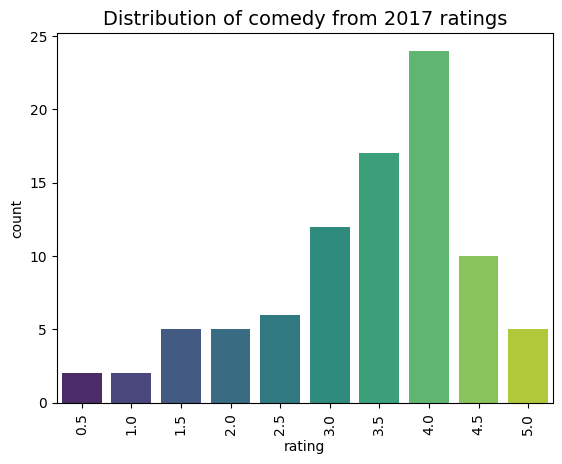

3.449017848559618
['Matrix, The ', 'Star Wars: Episode IV - A New Hope ', 'Jurassic Park ']
['Forrest Gump ', 'Shawshank Redemption, The ', 'Pulp Fiction ']


In [106]:
n = 0
for i, row in movies_with_ratings.iterrows():
  value = movies_with_ratings.at[i, 'genres']
  if 'Sci-Fi' in value:
    n +=1
print(n)


titles = []
for i, row in movies_with_ratings.iterrows():
    value = movies_with_ratings.at[i, 'genres']
    year = movies_with_ratings.at[i, 'year']
    if year == '2017' and 'Comedy' in value:
        titles.append(movies_with_ratings.at[i, 'title'])

df_title_ratings = movies_with_ratings.loc[movies_with_ratings['title'].isin(titles)]
sns.countplot(x="rating", data=df_title_ratings, palette="viridis")
plt.title("Distribution of comedy from 2017 ratings", fontsize=14)
plt.xticks(rotation=90)
plt.show()

action =[]
for i, row in movies_with_ratings.iterrows():
    value = movies_with_ratings.at[i, 'genres']
    if 'Action' in value:
        action.append(movies_with_ratings.at[i, 'title'])

df_action = movies_with_ratings.loc[movies_with_ratings['title'].isin(action)]
print(df_action['rating'].mean())

most_popular_action = df_action['title'].value_counts()[:3].index.tolist()
print(most_popular_action)

most_popular_overall = movies_with_ratings['title'].value_counts()[:3].index.tolist()
print(most_popular_overall)



#System rekomendacyjny

Zbuduj system na podstawie algorytmu SVD oraz kNN Baseline

*   Zbuduj system na podstawie algorytmu SVD oraz kNN Baseline
*   Czym różni się algorytm kNN Baseline od standardowego kNN?
*   Wykorzystaj metodę hiperparametryzacji GridSearch do wyboru liczby sąsiadów od 2-6
*   W ocenie algorytmów wykorzystaj walidację krzyżową


SVD

In [13]:
def svd_similar_movies(df, movie_id, num_similar=5):
    reader = Reader(rating_scale=(1, 5))

    data = Dataset.load_from_df(df[['userId', 'movieId', 'rating']], reader)

    trainset = data.build_full_trainset()
    model = SVD(n_factors = 50, n_epochs=20,random_state=3)
    model.fit(trainset)



    movie_inner_id = trainset.to_inner_iid(movie_id)
    movie_factors = model.qi[movie_inner_id]

    # similarities = cosine_similarity([movie_factors], model.qi)[0]

    # similar_indices = movie_factors.argsort()[::-1][1:num_similar+1]
    # similar_movie_ids = [trainset.to_raw_iid(inner_id) for inner_id in similar_indices]
    best_neighbors = sorted(movie_factors, key=lambda x: model.sim[movie_inner_id, x], reverse=True)
    return best_neighbors

In [46]:
def svd_similar_movies(df, movie_id, num_similar=5):
    reader = Reader(rating_scale=(1, 5))
    data = Dataset.load_from_df(df[['userId', 'movieId', 'rating']], reader)
    trainset = data.build_full_trainset()

    #Metodą prób i błędów dostrajałam algorytm, random_state jest ustawiony po to by wyniki były stałe bez względu na wywołanie
    model = SVD(n_factors=200, n_epochs=30, random_state=2)
    model.fit(trainset)

    movie_inner_id = trainset.to_inner_iid(movie_id)
    movie_factors = model.qi[movie_inner_id]

    #Mierzymy podobieństwo iloczynem skalarnym
    similarities = np.dot(model.qi, movie_factors)

    similar_indices = similarities.argsort()[::-1][1:num_similar+1]
    similar_movie_ids = [trainset.to_raw_iid(inner_id) for inner_id in similar_indices]
    return similar_movie_ids


Test SVD manualny - metoda ekspercka ocena na podstawie zwróconych wyników


*   Do filmu "Toy Story"  zostały dobrane następujace filmy
(Toy Story 2
Babe
Back to the Future
Incredibles, The
Finding Nemo) każdy z wymeinionych filmów ma minimun jeden gatunek w kolumnie "genres" który wystąpił wsród gatunków do któych zalicza się "Toy Story"







In [67]:
movie_titles = dict(zip(movies['movieId'], movies['title']))
movie_id = 1
similar_ids = svd_similar_movies(movies_with_ratings, movie_id)
movie_title = movie_titles[movie_id]

titles = [movie_title]
print(f"Because you watched {movie_title}")
for i in similar_ids:
    print(movie_titles[i])
    titles.append(movie_titles[i])

current_movies = movies_with_ratings[movies_with_ratings['title'].isin(titles)].drop_duplicates(subset=['title'])
current_movies


Because you watched Toy Story 
Toy Story 2 
Babe 
Back to the Future 
Incredibles, The 
Finding Nemo 


,userId,movieId,rating,title,genres,year
0,1,1,4.0,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995
85,1,1270,5.0,Back to the Future,"[Adventure, Comedy, Sci-Fi]",1985
518,5,34,4.0,Babe,"[Children, Drama]",1995
927,7,3114,4.5,Toy Story 2,"[Adventure, Animation, Children, Comedy, Fantasy]",1999
992,7,8961,4.0,"Incredibles, The","[Action, Adventure, Animation, Children, Comedy]",2004
1150,10,6377,3.5,Finding Nemo,"[Adventure, Animation, Children, Comedy]",2003


Test z biblioteki suprise


*   RMSE na podziomie 0,87 co oznacza,iż model względnie dobrze radzi sobie z rekomendacją podobnych filmów



In [58]:

reader = Reader(rating_scale=(1, 5))
data =Dataset.load_from_df(movies_with_ratings[['userId', 'movieId', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=0.2)

algo = SVD()

# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.test(testset)

accuracy.rmse(predictions)

RMSE: 0.8755


0.8755243664823753

KNN

In [68]:

def knn_baseline_similar_movies(movies_df, movie_id, num_similar=5):

    reader = Reader(rating_scale=(1, 5))
    data = Dataset.load_from_df(movies_df[['userId', 'movieId', 'rating']], reader)

    trainset = data.build_full_trainset()
    model = KNNBaseline(sim_options={'name': 'pearson_baseline', 'user_based': False})
    model.fit(trainset)

    movie_inner_id = trainset.to_inner_iid(movie_id)
    similar_movies = model.get_neighbors(movie_inner_id, k=num_similar)


    similar_movie_ids = [trainset.to_raw_iid(inner_id) for inner_id in similar_movies]
    return similar_movie_ids

Test KNN manualny - metoda ekspercka ocena na podstawie zwróconych wyników


*   Do filmu "Toy Story"  zostały dobrane następujace filmy
(Toy Story 2
Aladdin
Incredibles, The
Finding Nemo
Back to the Future ) każdy z wymeinionych filmów ma minimun jeden gatunek w kolumnie "genres" który wystąpił wsród gatunków do któych zalicza się "Toy Story"



In [69]:
movie_titles = dict(zip(movies['movieId'], movies['title']))
movie_id = 1
similar_ids = knn_baseline_similar_movies(movies_with_ratings, movie_id)
movie_title = movie_titles[movie_id]
titles = [movie_title]
print(f"Because you watched {movie_title}")
for i in similar_ids:
    print(movie_titles[i])
    titles.append(movie_titles[i])


current_movies = movies_with_ratings[movies_with_ratings['title'].isin(titles)].drop_duplicates(subset=['title'])
current_movies

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Because you watched Toy Story 
Toy Story 2 
Aladdin 
Incredibles, The 
Finding Nemo 
Back to the Future 


,userId,movieId,rating,title,genres,year
0,1,1,4.0,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995
85,1,1270,5.0,Back to the Future,"[Adventure, Comedy, Sci-Fi]",1985
338,4,588,4.0,Aladdin,"[Adventure, Animation, Children, Comedy, Musical]",1992
927,7,3114,4.5,Toy Story 2,"[Adventure, Animation, Children, Comedy, Fantasy]",1999
992,7,8961,4.0,"Incredibles, The","[Action, Adventure, Animation, Children, Comedy]",2004
1150,10,6377,3.5,Finding Nemo,"[Adventure, Animation, Children, Comedy]",2003


Test z biblioteki suprise


*   RMSE w tym przypadku jest na podziomie 0,85 co również sugeruje,iż model względnie dobrze radzi sobie z rekomendacją podobnych filmów



In [70]:

reader = Reader(rating_scale=(1, 5))
data =Dataset.load_from_df(movies_with_ratings[['userId', 'movieId', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=0.2)

algo = KNNBaseline(sim_options={'name': 'pearson_baseline', 'user_based': False})

# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.test(testset)

accuracy.rmse(predictions)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8505


0.8505364118621821

Czym różni się algorytm kNN Baseline od standardowego kNN?



*  kNN Baseline jest to algorytm KNN wzbogacony o oceny bazowe, dla każdego  użytkownika i przedmiotu. Ocena bazowa jest obliczana na podstawie średniej ocen, średniej ocen użytkownika i średniej oceny przedmiotu.Dzięki temu algorytm kNN Baseline koryguje oceny użytkowników i przedmiotów, co może poprawić jakość rekomendacji. Jednocześnie, kNN Baseline może mieć dodatkowe parametry regulujące proces obliczania baseline'ów i podobieństwa między użytkownikami lub przedmiotami, co daje większą elastyczność w dostosowywaniu algorytmu do konkretnego problemu.

*   Podobieństwo między użytkownikami lub przedmiotami obliczane jest na podstawie różnicy między ocenami użytkowników a ich ocenami bazowymi zaś w zwykłym kNN, podobieństwo to jest obliczane na podstawie różnicy między ocenami użytkowników lub ocenami przedmiotów.


Wykorzystaj metodę hiperparametryzacji GridSearch do wyboru liczby sąsiadów od
2-6




---
W przypadku SVD najlepszą liczbą sąsiadów będzie 2, zaś przy Knn Baseline będzie to 6


---
Wyniki pozostają takie same dla cv >=3


In [107]:
import pandas as pd
from surprise import Dataset, Reader
from surprise.model_selection import GridSearchCV
from surprise import SVD, KNNBaseline

reader = Reader(rating_scale=(1, 5))

data = Dataset.load_from_df(movies_with_ratings[['userId', 'movieId', 'rating']], reader)
param_grid_svd = {'n_factors':  [2, 3, 4, 5, 6]}


param_grid_knn = {'k': [2, 3, 4, 5, 6]}

svd = SVD()
knn = KNNBaseline()

gs_svd = GridSearchCV(SVD, param_grid_svd, measures=['rmse', 'mae'], cv=10)
gs_svd.fit(data)


gs_knn = GridSearchCV(KNNBaseline, param_grid_knn, measures=['rmse', 'mae'], cv=10)
gs_knn.fit(data)


print("SVD:", gs_svd.best_params['rmse'])
print("KNN Baseline:", gs_knn.best_params['rmse'])


Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matr

#W ocenie algorytmów wykorzystaj walidację krzyżową
tworzę ją dla optymalnych modeli (czyli SVD n_factors =3 i dla KNN_Baseline k =6)



*   Niskie odchylenie standardowe (0,008) przy RMSE sugeruje, iż model jest względnie stabilny



In [75]:
algo = SVD(n_factors =3)

data = Dataset.load_from_df(movies_with_ratings[['userId', 'movieId', 'rating']], reader)
cross = cross_validate(algo, data, measures=["RMSE", "MAE"], cv=3, verbose=True)
cross['test_rmse'].std()

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.8696  0.8848  0.8668  0.8737  0.0079  
MAE (testset)     0.6694  0.6779  0.6692  0.6722  0.0040  
Fit time          0.65    0.67    0.62    0.65    0.02    
Test time         0.21    0.21    0.45    0.29    0.11    


0.007928269610327983

*   Niskie odchylenie standardowe (0,005) przy RMSE sugeruje, iż model jest względnie stabilny


In [78]:

knn_baseline = KNNBaseline(k= 6, min_k=1, sim_options={}, bsl_options={}, verbose=True)
cross = cross_validate(knn_baseline, data, n_jobs=-1)
print(cross['test_rmse'].std())
print(cross['test_rmse'].mean())

0.005152448811522985
0.894798345225235


#3. Podaj rekomendacje po obejrzeniu filmu: Penguins of Madagascar oraz Hobbit: The Desolation of Smaug, The

In [100]:
 movies_with_ratings.loc[movies_with_ratings['title'].isin(["Penguins of Madagascar ", "Hobbit: The Desolation of Smaug, The "])].drop_duplicates(subset=['title'])

,userId,movieId,rating,title,genres,year
1244,10,106489,3.5,"Hobbit: The Desolation of Smaug, The","[Adventure, Fantasy, IMAX]",2013
3615,21,117851,3.0,Penguins of Madagascar,"[Adventure, Animation, Children, Comedy]",2014


Pingwiny z Madagaskaru

In [90]:
movies_with_ratings.loc[movies_with_ratings['title'] == "Penguins of Madagascar "]

,userId,movieId,rating,title,genres,year
3615,21,117851,3.0,Penguins of Madagascar,"[Adventure, Animation, Children, Comedy]",2014
16833,105,117851,3.5,Penguins of Madagascar,"[Adventure, Animation, Children, Comedy]",2014
17769,111,117851,3.5,Penguins of Madagascar,"[Adventure, Animation, Children, Comedy]",2014
37883,256,117851,3.5,Penguins of Madagascar,"[Adventure, Animation, Children, Comedy]",2014
90215,586,117851,5.0,Penguins of Madagascar,"[Adventure, Animation, Children, Comedy]",2014


In [91]:
movie_titles = dict(zip(movies['movieId'], movies['title']))
movie_id = 117851
similar_ids_knn = knn_baseline_similar_movies(movies_with_ratings, movie_id)
movie_title = movie_titles[movie_id]
print("------------------------------------")
print(f"Because you watched {movie_title} besed on KNN-Baseline you should watch")
for i in similar_ids_knn:
    print(movie_titles[i])

print("------------------------------------")
similar_ids_svd = svd_similar_movies(movies_with_ratings, movie_id)
movie_title = movie_titles[movie_id]
print(f"Because you watched {movie_title} besed on SVD you should watch")
for i in similar_ids_svd:
    print(movie_titles[i])

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
------------------------------------
Because you watched Penguins of Madagascar  besed on KNN-Baseline you should watch
Good Will Hunting 
Mad Max: Fury Road 
Kung Fu Panda 
Chronicles of Narnia: The Lion, the Witch and the Wardrobe, The 
Harry Potter and the Prisoner of Azkaban 
------------------------------------
Because you watched Penguins of Madagascar  besed on SVD you should watch
Gladiator 
Life of Pi 
Piano, The 
Animals are Beautiful People 
Moana 


Manulany test dla KNN-Baseline


*   Filmy rekomendowane po obejżeniu "Pingwinów z Madagaskaru" to Good Will Hunting
Mad Max: Fury Road
Kung Fu Panda
Chronicles of Narnia: The Lion, the Witch and the Wardrobe, The
Harry Potter and the Prisoner of Azkaban
*   Wśród 4 z 5 filmów min 1 z gatunków pokrywa się z gatunkami występującymi w  filmie "Pingwiny z Madagaskaru"
*   Sednie dopasowanie mozę wynikać z małej ilości ocen "Pingwinów z Mdagaskaru"(tylko 5)



In [92]:
 movies_with_ratings[movies_with_ratings['movieId'] ==106489].count()

userId     5
movieId    5
rating     5
title      5
genres     5
year       5
dtype: int64

In [93]:
movie_titles = dict(zip(movies['movieId'], movies['title']))
movie_id = 106489
similar_ids_knn = knn_baseline_similar_movies(movies_with_ratings, movie_id)
movie_title = movie_titles[movie_id]

titles = [movie_title]
print(f"Because you watched {movie_title}")
for i in similar_ids_knn:
    print(movie_titles[i])
    titles.append(movie_titles[i])

current_movies = movies_with_ratings[movies_with_ratings['title'].isin(titles)].drop_duplicates(subset=['title'])
current_movies



Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Because you watched Penguins of Madagascar 
Good Will Hunting 
Mad Max: Fury Road 
Kung Fu Panda 
Chronicles of Narnia: The Lion, the Witch and the Wardrobe, The 
Harry Potter and the Prisoner of Azkaban 


,userId,movieId,rating,title,genres,year
234,2,1704,4.5,Good Will Hunting,"[Drama, Romance]",1997
259,2,122882,5.0,Mad Max: Fury Road,"[Action, Adventure, Sci-Fi, Thriller]",2015
976,7,8368,2.5,Harry Potter and the Prisoner of Azkaban,"[Adventure, Fantasy, IMAX]",2004
2116,18,59784,4.0,Kung Fu Panda,"[Action, Animation, Children, Comedy, IMAX]",2008
3430,21,41566,3.0,"Chronicles of Narnia: The Lion, the Witch and ...","[Adventure, Children, Fantasy]",2005
3615,21,117851,3.0,Penguins of Madagascar,"[Adventure, Animation, Children, Comedy]",2014


Manulany test dla SVD


*   Filmy rekomendowane po obejżeniu "Pingwinów z Madagaskaru" to Good Will Hunting
Mad Max: Fury Road
Kung Fu Panda
Chronicles of Narnia: The Lion, the Witch and the Wardrobe, The
Harry Potter and the Prisoner of Azkaban
*   Podobnie w 4 z 5 filmów min 1 z gatunków pokrywa się z gatunkami występującymi w  filmie "Pingwiny z Madagaskaru"
*   Sednie dopasowanie mozę wynikać z małej ilości ocen "Pingwinów z Mdagaskaru"(tylko 5)



In [94]:
movie_titles = dict(zip(movies['movieId'], movies['title']))
movie_id = 106489
similar_ids_svd = svd_similar_movies(movies_with_ratings, movie_id)
movie_title = movie_titles[movie_id]

titles = [movie_title]
print(f"Because you watched {movie_title}")
for i in similar_ids_svd:
    print(movie_titles[i])
    titles.append(movie_titles[i])

current_movies = movies_with_ratings[movies_with_ratings['title'].isin(titles)].drop_duplicates(subset=['title'])
current_movies


Because you watched Penguins of Madagascar 
Gladiator 
Life of Pi 
Piano, The 
Animals are Beautiful People 
Moana 


,userId,movieId,rating,title,genres,year
219,1,3578,5.0,Gladiator,"[Action, Adventure, Drama]",2000
334,4,509,1.0,"Piano, The","[Drama, Romance]",1993
1238,10,97938,1.0,Life of Pi,"[Adventure, Drama, IMAX]",2012
3615,21,117851,3.0,Penguins of Madagascar,"[Adventure, Animation, Children, Comedy]",2014
17856,111,166461,4.5,Moana,"[Adventure, Animation, Children, Comedy, Fantasy]",2016
61101,398,6408,5.0,Animals are Beautiful People,"[Comedy, Documentary]",1974


Hobbit: The Desolation of Smaug, The  

In [101]:
movie_titles = dict(zip(movies['movieId'], movies['title']))
movie_id = 106489
similar_ids_knn = knn_baseline_similar_movies(movies_with_ratings, movie_id)
movie_title = movie_titles[movie_id]
print("------------------------------------")
print(f"Because you watched {movie_title} besed on KNN-Baseline you should watch")
for i in similar_ids_knn:
    print(movie_titles[i])

print("------------------------------------")
similar_ids_svd = svd_similar_movies(movies_with_ratings, movie_id)
movie_title = movie_titles[movie_id]
print(f"Because you watched {movie_title} besed on SVD you should watch")
for i in similar_ids_svd:
    print(movie_titles[i])

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
------------------------------------
Because you watched Hobbit: The Desolation of Smaug, The  besed on KNN-Baseline you should watch
Lord of the Rings: The Fellowship of the Ring, The 
Lord of the Rings: The Two Towers, The 
Sherlock Holmes 
The Hobbit: The Battle of the Five Armies 
Sherlock Holmes: A Game of Shadows 
------------------------------------
Because you watched Hobbit: The Desolation of Smaug, The  besed on SVD you should watch
Lord of the Rings: The Two Towers, The 
Lord of the Rings: The Fellowship of the Ring, The 
Stepford Wives, The 
Pirates of the Caribbean: Dead Man's Chest 
Final Destination 


Manulany test dla KNN-Baseline


*   Filmy rekomendowane po obejżeniu " Hobbit: The Desolation of Smaug, The  " to
Lord of the Rings: The Fellowship of the Ring, The
Lord of the Rings: The Two Towers, The
Sherlock Holmes
The Hobbit: The Battle of the Five Armies
Sherlock Holmes: A Game of Shadows
userId	movieId	rating
*   Każdy z rekomendowanych filmów dzieli min jeden z gatunków które występują w " Hobbit: The Desolation of Smaug, The  " z czego 3 posiadają dwa wpólne gatunki
*   Dopasowana została następna cześć Hobbita jak i dwie częsci z powiazanej serii Władcy pierścienia
*   Wszystkie filmy pochodzą z lat 2000-2014, gdzie Hobbit postaw w 2013
*   Widac tu świetnie jak większa ilość ocen(25) kożystnie wpływa na wyniki systemu rekomendacji



In [103]:
 movies_with_ratings[movies_with_ratings['movieId'] ==106489].count()

userId     25
movieId    25
rating     25
title      25
genres     25
year       25
dtype: int64

In [102]:
movie_titles = dict(zip(movies['movieId'], movies['title']))
movie_id = 106489
similar_ids_knn = knn_baseline_similar_movies(movies_with_ratings, movie_id)
movie_title = movie_titles[movie_id]

titles = [movie_title]
print(f"Because you watched {movie_title}")
for i in similar_ids_knn:
    print(movie_titles[i])
    titles.append(movie_titles[i])

current_movies = movies_with_ratings[movies_with_ratings['title'].isin(titles)].drop_duplicates(subset=['title'])
current_movies



Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Because you watched Hobbit: The Desolation of Smaug, The 
Lord of the Rings: The Fellowship of the Ring, The 
Lord of the Rings: The Two Towers, The 
Sherlock Holmes 
The Hobbit: The Battle of the Five Armies 
Sherlock Holmes: A Game of Shadows 


,userId,movieId,rating,title,genres,year
950,7,4993,4.5,"Lord of the Rings: The Fellowship of the Ring,...","[Adventure, Fantasy]",2001
961,7,5952,4.5,"Lord of the Rings: The Two Towers, The","[Adventure, Fantasy]",2002
1212,10,73017,3.0,Sherlock Holmes,"[Action, Crime, Mystery, Thriller]",2009
1244,10,106489,3.5,"Hobbit: The Desolation of Smaug, The","[Adventure, Fantasy, IMAX]",2013
2187,18,91542,4.0,Sherlock Holmes: A Game of Shadows,"[Action, Adventure, Comedy, Crime, Mystery, Th...",2011
9096,62,118696,4.0,The Hobbit: The Battle of the Five Armies,"[Adventure, Fantasy]",2014




*   Filmy rekomendowane po obejżeniu " Hobbit: The Desolation of Smaug, The  " to
Lord of the Rings: The Fellowship of the Ring, The
Lord of the Rings: The Two Towers, The
Sherlock Holmes
The Hobbit: The Battle of the Five Armies
Sherlock Holmes: A Game of Shadows
userId	movieId	rating
*   Każdy z rekomendowanych filmów dzieli min jeden z gatunków które występują w " Hobbit: The Desolation of Smaug, The  " z czego 3 posiadają 2 gatunki
*   Dopasowana została nastepna cześć Hobbita jak i dwie częsci z powiazanej serii Władcy pierścienia
*   Wszystkie filmy pochodzą z lat 2000-2014, gdzie Hobbit postaw w 2013





In [104]:
movie_titles = dict(zip(movies['movieId'], movies['title']))
movie_id = 106489
similar_ids_svd = svd_similar_movies(movies_with_ratings, movie_id)
movie_title = movie_titles[movie_id]

titles = [movie_title]
print(f"Because you watched {movie_title}")
for i in similar_ids_svd:
    print(movie_titles[i])
    titles.append(movie_titles[i])

current_movies = movies_with_ratings[movies_with_ratings['title'].isin(titles)].drop_duplicates(subset=['title'])
current_movies


Because you watched Hobbit: The Desolation of Smaug, The 
Lord of the Rings: The Two Towers, The 
Lord of the Rings: The Fellowship of the Ring, The 
Stepford Wives, The 
Pirates of the Caribbean: Dead Man's Chest 
Final Destination 


,userId,movieId,rating,title,genres,year
950,7,4993,4.5,"Lord of the Rings: The Fellowship of the Ring,...","[Adventure, Fantasy]",2001
961,7,5952,4.5,"Lord of the Rings: The Two Towers, The","[Adventure, Fantasy]",2002
977,7,8373,2.0,"Stepford Wives, The","[Comedy, Fantasy, Thriller]",2004
1244,10,106489,3.5,"Hobbit: The Desolation of Smaug, The","[Adventure, Fantasy, IMAX]",2013
1369,13,3409,2.0,Final Destination,"[Drama, Thriller]",2000
2080,18,45722,4.0,Pirates of the Caribbean: Dead Man's Chest,"[Action, Adventure, Fantasy]",2006
